### Whats Sklearn or Scikit learn

### Machine Learning in Python. Simple and efficient tools for data mining and data analysis

### We will learn the following using scikit learn 



* Training Supervised Algorithms Linear regression, Random Forest etc
* hyper paramaters tuning with Gridsearch and RandomSearch
* pipelines, transformers and estimators
* Dealing with Imbalance datasets using SMOTE
* Metrics in Scikit Learn
* Some Assignments
* A kaggle project

# Supervised Learning

In supervised learning, you train a machine learning model with the help of labelled data. Once a model has been trained using a input feature and labels, the model can predict the labels of test data. 

### Examples of Algorithms 

* Linear Regression: a Machine Learning algorithm that allows us to map numeric inputs to numeric outputs, fitting a line into the data points.

  Link : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
  
  Check out this example:
  https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

* Logistic Regression: a classification algorithm that is widely used when the dependent variable is binary (0 or 1).

  Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
  
  Checkout this example:
  https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py

* Support Vector Machines: a Machine Learning algorithm that uses Margin Maximization in determining the optimal separator line between classes, utilizing the Kernel Trick.

  Link: https://scikit-learn.org/stable/modules/svm.html

* Decision Trees: Tree/ Graph algorithm based on simple rules. It creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

  Link : https://scikit-learn.org/stable/modules/tree.html


* Random Forest: Random Forest is an Ensemble model where a large number of weak classifiers (In this case smaller decison trees) are trained to model the data distribution. This method of training a number of smaller classifier to learn a function is called Bagging or bootstrap aggregation. Bagging is a special case of the model averaging approach. 

  Link : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  Read more about Random Forests here : https://towardsdatascience.com/understanding-random-forest-58381e0602d2
  
  Difference between bagging and boosting: https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

### Sklearn (scikit-learn) -The Most popular library for non deep learning based machine learning in python.

In [41]:
%matplotlib inline
from IPython.display import display, Math, Latex
import matplotlib.pylab as plt
import numpy as np


### Scikit Learn Datasets

Scikit learn provides us with a large number of curated datasets to help us learn and use the various machine learning
algorithms that it supports. This include both quantitative, text and images

Link : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

##### Linear models includes the following

* Oridinary Linear regression
* Lasso Regression - L1 Penalty
* Rige Regression - L2 Penalty
* Logistic Regression 


### We will begin with Linear regression on the Boston Housing data set

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$



In [42]:
from sklearn.datasets import load_boston # This method will download and load the boston datasets


In [43]:
boston=load_boston()
print(type(boston))
boston.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [44]:
boston.data.shape

(506, 13)

In [45]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [46]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [47]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Want to see what those features mean ?

In [48]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Lets learn more about this dataset. Data Exploration is sometimes key in understanding your data

We will convert the data to a pandas dataframe

In [49]:
import pandas as pd

In [50]:
df_boston = pd.DataFrame(boston.data)
df_boston.columns = boston.feature_names
df_boston['PRICE'] = boston.target

In [51]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
# The target is the housing prices
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [54]:
# lets study one of the features - AGE
df_boston.AGE.describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

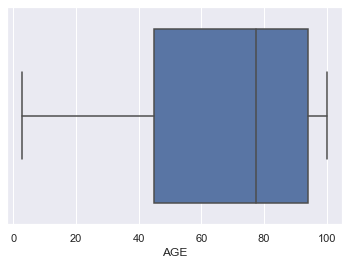

In [55]:
import seaborn as sns
sns.set()

sns.boxplot(x="AGE",
              data=df_boston)

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

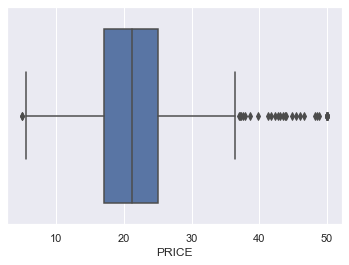

In [56]:
# Always understand what we are predicting. We will learn to work with missing values etc later

sns.boxplot(x="PRICE",
              data=df_boston)
df_boston['PRICE'].describe()

In [57]:
# We can see that there are outliers in the data, too many standard deviations away from the mean.

In [58]:
from sklearn.linear_model import LinearRegression # Loads the linear regression model


In [60]:
# prepare the input data and labels

 # drops the prices column in the datasets. We will predict the prices or use it as our label/target
X = df_boston.drop('PRICE', axis=1).values
y = df_boston['PRICE'].values


Now that we have the data, we need to split our data into train and test set. Again we will use Sklearn tools

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3) 

# Above we split our total data into 70% train and 30% test

In [62]:
# Lets fit our training data using a linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# Now that we have trained model, lets make predictions on the test data
y_pred=regressor.predict(X_test)[:10]

# The below are the predicted prices
y_pred[:10]

array([37.38997666, 31.56794193, 27.13373886,  6.55117625, 33.69310848,
        5.54919368, 27.10005629, 29.82980986, 26.44622421, 22.38873525])

In [64]:
# The regression library comes with a score function
print("R^2 on training set: %f" % regressor.score(X_train, y_train))
print("R^2 on test set: %f" % regressor.score(X_test, y_test))

R^2 on training set: 0.761160
R^2 on test set: 0.677170


# Always check the sklearn parameters for each algorithm
Parameters:	
fit_intercept : boolean, optional, default True
whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.

copy_X : boolean, optional, default True
If True, X will be copied; else, it may be overwritten.

n_jobs : int or None, optional (default=None)
The number of jobs to use for the computation.None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

Attributes:	
coef_ : array, shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem. 

intercept_ : array
Independent term in the linear model.

In [65]:

regressor = LinearRegression(copy_X=True, fit_intercept=True, normalize=False) # There are always more parameters
regressor.fit(X_train, y_train) #training the algorithm
print("R^2 on training set: %f" % regressor.score(X_train, y_train))
print("R^2 on test set: %f" % regressor.score(X_test, y_test))


R^2 on training set: 0.761160
R^2 on test set: 0.677170


Recall our input data. Its import to normalize our data to make better predictions. Sklearn provides many tools
for data preprocessing. For example our linear regression model allows us to set normalize the data by setting
#### normalize = True

In [66]:
regressor = LinearRegression(copy_X=True, fit_intercept=True, normalize=True) # There are always more parameters

#### OR you could use the preprocessing library in Sklearn

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Mostly we use standard scalar or normalize functions. Basically the idea is to have the input features as a normal distribution with mean around zero and standard deviation of one (z-score).

z = (x - mu)/std where mu is the mean and std is the standard deviation.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [69]:
# We can even scale our target variable

from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train) 
X_test_norm = normalize(X_test)

# We can even do this for our target variable 'prices'
print (df_boston['PRICE'].describe())
y_train_norm = y_train/50 # dividing by the max
y_test_norm = y_test/50 

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64


In [70]:
regressor = LinearRegression(copy_X=True, fit_intercept=True, normalize=False) # There are always more parameters
regressor.fit(X_train_norm, y_train) #training the algorithm
print("R^2 on training set: %f" % regressor.score(X_train_norm, y_train))
print("R^2 on test set: %f" % regressor.score(X_test_norm, y_test))

R^2 on training set: 0.774417
R^2 on test set: 0.662656


For simple dataset, we have no improvement in our performance, but you will see the importance of this as we move
ahead this this class

To understand more about importance of feature scaling, study the below links

* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


###### Recommended to check this out
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py  

Recall that a simple Linear regression model with just 2 features is about fitting a straight line and higher the features we have , we fit a hyper plane instead. Lines have intercepts and coefficients.

y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn

#### We can use the attributes of our trained model to see our coefficients and parameters

In [71]:
regressor.intercept_

1.3934743194941426

In [35]:
features = boston.feature_names
coefficents =regressor.coef_ # these are the coeff for our 13 features
df_boston_model=pd.DataFrame(features,
                             columns= ['feature'])
df_boston_model['coeff'] = coefficents
df_boston_model.head(15)

,feature,coeff
0,CRIM,-131.846359
1,ZN,15.549806
2,INDUS,8.560365
3,CHAS,546.404225
4,NOX,-5139.190998
5,RM,2850.804773
6,AGE,-6.954764
7,DIS,-541.893046
8,RAD,163.530146
9,TAX,6.566476


###### ROOT MEAN SQUARE ERROR AS A MEASURE TO STUDY MODEL PERFORMANCE. One of the metrics supported by sklearn

$$
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$$

In [72]:
from sklearn.metrics import mean_squared_error

regressor = LinearRegression(copy_X=True, fit_intercept=True, normalize=False) # There are always more parameters
regressor.fit(X_train, y_train) #training the algorithm

y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
print (mean_squared_error(y_train_pred, y_train))
print (mean_squared_error(y_test_pred, y_test))

# There is room for more improvement here, We will try with more complex models later to get better results

19.068341850927226
30.69703770408852


#### Lets not discuss about Lasso regressor and Ridge Regressor which uses L1 and L2 regularization functions respectively.


* The Lasso estimator(L1 Penalty)
The Lasso estimator is useful to impose sparsity on the coefficient. In other words, it is to be prefered if we believe that many of the features are not relevant. This is done via the so-called l1 penalty.

$$ \text{min}_{w, b} \sum_i \frac{1}{2} || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1$$

Link : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

* Ridge Regression (L2 penalty)¶
The Ridge estimator is a simple regularization (called l2 penalty) of the ordinary LinearRegression. In particular, it has the benefit of being not computationally more expensive than the ordinary least square estimate.

$$ \text{min}_{w,b}  \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_2^2$$
The amount of regularization is set via the alpha parameter of the Ridge.

Link : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

### Readmore about L1 and L2
Difference between L1 and L2 regularization : http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/

In [73]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [74]:
clf_lasso = Lasso(alpha=0.001)
clf_lasso.fit(X_train, y_train)
print("R^2 on training set: %f" % clf_lasso.score(X_train, y_train))
print("R^2 on test set: %f" % clf_lasso.score(X_test, y_test))

R^2 on training set: 0.761155
R^2 on test set: 0.676645


In [75]:
clf_ridge = Ridge(alpha=0.001)
clf_ridge.fit(X_train, y_train)
print("R^2 on training set: %f" % clf_ridge.score(X_train, y_train))
print("R^2 on test set: %f" % clf_ridge.score(X_test, y_test))

R^2 on training set: 0.761160
R^2 on test set: 0.677156


## Q. Try different values of alpha and check the change in score

IF you notice above alpha or the regularization coefficient is a hyper parameter. This needs to be tuned to get the best possible results. Hyper tuning and cross validation using sklearn will be explained in the later slides.

# However check the below example

In [76]:
for value in [0.001, 0.01, 0.1, 1, 10, 100]:
    print ("="* 10)
    print (f"The value for regularization is: {value}")
    clf_ridge = Ridge(alpha=value)
    clf_ridge.fit(X_train, y_train)
    print("R^2 on training set: %f" % clf_ridge.score(X_train, y_train))
    print("R^2 on test set: %f" % clf_ridge.score(X_test, y_test))
    

The value for regularization is: 0.001
R^2 on training set: 0.761160
R^2 on test set: 0.677156
The value for regularization is: 0.01
R^2 on training set: 0.761159
R^2 on test set: 0.677033
The value for regularization is: 0.1
R^2 on training set: 0.761111
R^2 on test set: 0.675869
The value for regularization is: 1
R^2 on training set: 0.759671
R^2 on test set: 0.668636
The value for regularization is: 10
R^2 on training set: 0.755695
R^2 on test set: 0.658493
The value for regularization is: 100
R^2 on training set: 0.740130
R^2 on test set: 0.645040


## Activity Time
Try out different values of alpha for Lasso Regression

##### GridSearch, Random search of hyper parameters and Cross validation

Sources:

1. https://towardsdatascience.com/what-are-supervised-and-unsupervised-learning-in-machine-learning-dc76bd67795d
2. https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
3. https://github.com/amueller/scipy-2018-sklearn/blob/master/notebooks/17.In_Depth-Linear_Models.ipynb
4. Sklearn

